In [1]:
code1315_a = [6, 8 , 6, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14]
code1315_k = range(4, 27)
code1317_a = [7, 6 , 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17]
code1317_k = range(4, 27)
frame_error_rate1315 = []
frame_error_prob1315 = []
import numpy as np
import math
import scipy.special
import matplotlib.pyplot as plt
font = {
    'family':'monospace',
    'size':21,
    'weight': 'semibold'}
plt.rc('font', **font)

In [2]:
answ1315, ansn1315 = ({4: np.array([6]),
  5: np.array([8]),
  6: np.array([6, 8]),
  7: np.array([ 8, 10]),
  8: np.array([ 8, 10, 12]),
  9: np.array([ 8, 10, 12, 14]),
  10: np.array([ 8, 10, 12, 14, 16]),
  11: np.array([ 8, 10, 12, 14, 16]),
  12: np.array([10, 12, 14, 16, 18]),
  13: np.array([10, 12, 14, 16, 18, 20]),
  14: np.array([10, 12, 14, 16, 18, 20, 22]),
  15: np.array([10, 12, 14, 16, 18, 20, 22, 24]),
  16: np.array([10, 12, 14, 16, 18, 20, 22, 24, 26]),
  17: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28]),
  18: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
  19: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
  20: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]),
  21: np.array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]),
  22: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
  23: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]),
  24: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]),
  25: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44]),
  26: np.array([14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46]),
  27: np.array([16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48])},
 {4: np.array([1]),
  5: np.array([1]),
  6: np.array([1, 1]),
  7: np.array([2, 2]),
  8: np.array([2, 4, 2]),
  9: np.array([2, 6, 5, 2]),
  10: np.array([ 1,  8, 13,  6,  1]),
  11: np.array([ 1,  8, 19, 20,  8]),
  12: np.array([ 8, 29, 38, 25,  8]),
  13: np.array([ 6, 34, 68, 64, 30,  6]),
  14: np.array([  4,  36, 100, 132,  93,  32,   4]),
  15: np.array([  2,  34, 132, 230, 220, 121,  32,   2]),
  16: np.array([  1,  28, 152, 358, 452, 329, 139,  30,   1]),
  17: np.array([ 21, 162, 490, 798, 777, 452, 147,  24,   1]),
  18: np.array([  13,  153,  616, 1269, 1555, 1197,  567,  148,   17,    1]),
  19: np.array([   7,  132,  701, 1824, 2794, 2712, 1693,  656,  139,   12,    1]),
  20: np.array([   3,  103,  733, 2397, 4527, 5442, 4305, 2218,  708,  123,    9,
            1]),
  21: np.array([   1,   72,  703, 2904, 6718, 9820, 9578, 6304, 2720,  716,  103,
            8,    1]),
  22: np.array([   45,   623,  3250,  9181, 16211, 19125, 15484,  8585,  3139,
           690,    82,     8,     1]),
  23: np.array([   24,   505,  3384, 11653, 24628, 34749, 34000, 23267, 10972,
          3415,   640,    66,     8,     1]),
  24: np.array([   11,   376,  3271, 13780, 34775, 58105, 67595, 55878, 32738,
         13257,  3529,   572,    57,     8,     1]),
  25: np.array([     4,    255,   2944,  15235,  45820,  90171, 123428, 121047,
          85752,  43414,  15212,   3493,    500,     53,      8,      1]),
  26: np.array([     1,    156,   2464,  15784,  56594, 130644, 208804, 240036,
         201697, 123789,  54562,  16660,   3338,    436,     52,      8,
              1]),
  27: np.array([    85,   1916,  15340,  65712, 177610, 329628, 440016, 432548,
         315298, 169122,  65298,  17492,   3114,    388,     52,      8,
              1])})

In [3]:
p_array = [0.004, 0.009]

BER_real = []
code_array = ['13_15', '13_17']

for code in code_array:
    ber_code, fer_code = [], []
    for p in p_array:
        fansrd = open('results/num_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')
        fwghrd = open('results/wgh_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')

        all_count1315rd, correct_count1315rd, falserd, errrd = [int(el) for el in fansrd.readline().split(' ')]

        line = fansrd.readline()
        dict_num = dict(zip(range(1000), np.zeros(1000)))
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_num[i] = j
            line = fansrd.readline()

        dict_wgh = dict(zip(range(1000), np.zeros(1000)))
        line = fwghrd.readline()
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_wgh[i] = j
            line = fwghrd.readline()

        
        ber_code.append((np.array(list(dict_wgh.values()))*np.array(list(dict_num.values()))).sum()/2000/all_count1315rd)
        
    BER_real.append(ber_code)

In [4]:
p_array_last = [0.005, 0.007, 0.008, 0.01, 0.02]

# BER_real = []
code_array = ['1315', '1317']

for code in code_array:
    ber_code = []
    for p in p_array_last:
        fansrd = open('results/num_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')
        fwghrd = open('results/wgh_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')

        all_count1315rd, correct_count1315rd, falserd, errrd = [int(el) for el in fansrd.readline().split(' ')]

        line = fansrd.readline()
        dict_num = dict(zip(range(1000), np.zeros(1000)))
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_num[i] = j
            line = fansrd.readline()

        dict_wgh = dict(zip(range(1000), np.zeros(1000)))
        line = fwghrd.readline()
        while(line):
            arr = line.split(' ')
            i,j = int(arr[0]), float(arr[1][:-1])
            dict_wgh[i] = j
            line = fwghrd.readline()

        dict_wgh[3] += 2

        ber_code.append((np.array(list(dict_wgh.values()))*np.array(list(dict_num.values()))).sum()/2000/all_count1315rd)
    
    BER_real.append(ber_code)

In [5]:
p_array_fer = [0.004, 0.005, 0.007, 0.008, 0.009, 0.01, 0.02]

FER_real = []
code_array = ['1315', '1317']

for code in code_array:
    fer_code = []
    for p in p_array_fer:
        fansrd = open('results/num_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')
        fwghrd = open('results/wgh_rd'+code+'_'+str(p)[2:]+'_ber1.dat', 'r')

        all_count1315rd, correct_count1315rd, falserd, errrd = [int(el) for el in fansrd.readline().split(' ')]

        fer_code.append(1 - correct_count1315rd/all_count1315rd)
    
    FER_real.append(fer_code)

In [6]:
BER_real[0].append(BER_real[2])
BER_real[1].append(BER_real[3])
p_array = p_array + p_array_last

In [7]:
from estimates import low_burst, up_burst

In [8]:
m = 3

In [9]:
max_weights_1315 = []
for key in answ1315.keys():
    max_weights_1315.append(max(answ1315[key]))

In [10]:
ber_upper_1315 = []
ber_lower_1315 = []
p_array_ = [0.001, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.05]
for p in p_array_:
    low_burst1315 = []

    for i in range(0,len(code1315_a)):
        low_burst1315.append(low_burst(code1315_a[i], code1315_k[i], p, m))

    up_burst1315 = [0]*24

    for i in range(4,27):
        for j,elem in enumerate(answ1315[i]):
            up_burst1315[i-4] += ansn1315[i][j]*up_burst(elem,i,p, m)
    ber_upper_1315.append((np.array(max_weights_1315) * np.array(up_burst1315)).sum()/2)
    ber_lower_1315.append((np.array(code1315_a) * np.array(low_burst1315))[0])

In [11]:
answ1317, ansn1317 = ({
    4: np.array([7]),
    5: np.array([6]),
    6: np.array([7, 8]),
    7: np.array([7, 8, 10, 11]),
    8: np.array([8, 9, 10, 12, 14]),
    9: np.array([8, 9, 10, 11, 12, 13]),
    10: np.array([9, 10, 11, 12, 13, 14, 15]),
    11: np.array([9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
    12: np.array([10, 11, 12, 13, 14, 15, 16, 17, 19, 21]),
    13: np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
    14: np.array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
    15: np.array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
    16: np.array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28]),
    17: np.array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
    18: np.array(
        [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
    19: np.array([
        13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31, 32
    ]),
    20: np.array([
        14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        33, 35
    ]), 
    21: np.array([
        14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34
    ]),
    22: np.array([
        15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36
    ]),
    23: np.array([
        15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39
    ]),
    24: np.array([
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 40, 42
    ]),
    25: np.array([
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41
    ]),
    26: np.array([
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43
    ]), 
    27: np.array([
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46
    ])
}, {
    4:np.array([1]),
    5:np.array([1]),
    6:np.array([1, 1]),
    7:np.array([1, 1, 1, 1]),
    8:np.array([1, 4, 1, 1, 1]),
    9:np.array([2, 1, 3, 4, 2, 3]),
    10:np.array([3, 6, 5, 4, 3, 5, 3]),
    11:np.array([3, 4, 5, 13, 13, 7, 5, 2, 2, 2]),
    12:np.array([5, 15, 10, 14, 22, 15, 17, 7, 2, 1]),
    13:np.array([5, 7, 18, 30, 34, 40, 21, 20, 21, 7, 5]),
    14:np.array([10, 27, 32, 40, 60, 79, 62, 36, 26, 12, 11, 6]),
    15:np.array([8, 16, 37, 81, 96, 105, 119, 100, 90, 71, 27, 11, 6, 3, 3]),
    16:np.array([18, 56, 68, 118, 186, 216, 253, 187, 127, 126, 71, 42, 18, 3,
              1]),
    17:np.array([
        13, 31, 89, 177, 254, 333, 355, 427, 424, 292, 222, 115, 63, 54, 16, 7
    ]),
    18:np.array([
        33, 106, 166, 285, 497, 683, 742, 743, 694, 560, 471, 300, 125, 72, 30,
        19, 10
    ]),
    19:np.array([
        21, 62, 186, 414, 614, 889, 1187, 1363, 1529, 1405, 1014, 784, 561,
        332, 201, 70, 19, 12, 4, 4
    ]),
    20: np.array([
        59, 206, 357, 712, 1257, 1815, 2349, 2465, 2597, 2672, 2134, 1623,
        1065, 550, 383, 202, 84, 34, 4, 1
    ]),
    21:np.array([
        34, 119, 395, 890, 1496, 2325, 3283, 4395, 5040, 5010, 4761, 3850,
        3057, 2345, 1293, 711, 350, 149, 106, 30, 9
    ]),
    22:np.array([
        105, 390, 782, 1628, 3101, 4786, 6445, 7964, 9051, 9584, 9369, 7659,
        5621, 4172, 2656, 1635, 905, 319, 148, 60, 29, 15
    ]),
    23:np.array([
        55, 227, 803, 1932, 3436, 5840, 8991, 12402, 15790, 17332, 17354,
        16980, 14761, 11552, 8425, 5091, 2972, 1830, 899, 436, 145, 29, 20, 5,
        5
    ]),
    24:np.array([
        185, 738, 1641, 3711, 7288, 12014, 17624, 23014, 28914, 33378, 33838,
        32202, 27374, 21295, 16559, 10986, 6403, 3598, 1644, 892, 445, 149, 55,
        5, 1
    ]),
    25:np.array([
        89, 426, 1617, 4057, 7851, 14112, 23152, 34439, 45618, 54818, 61301,
        62857, 61196, 54075, 41611, 30865, 20989, 13041, 8137, 3982, 1759, 805,
        299, 180, 50, 11
    ]),
    26:np.array([
        324, 1382, 3414, 8138, 16876, 29278, 45566, 64943, 85804, 105564,
        118081, 119042, 112974, 100844, 81517, 61865, 42339, 25413, 15465,
        8621, 4348, 2122, 679, 260, 105, 41, 21
    ]),
    27:np.array([
        144, 792, 3194, 8458, 17395, 33405, 57874, 90286, 128235, 163870,
        196163, 221209, 227667, 217697, 192050, 153460, 117501, 84535, 53855,
        32298, 17316, 8493, 4557, 2014, 816, 261, 41, 30, 6, 6
    ])
})

In [12]:
max_weights_1317 = []
for key in answ1317.keys():
    max_weights_1317.append(max(answ1317[key]))

In [13]:
ber_upper_1317 = []
ber_lower_1317 = []
for p in p_array_:
    low_burst1317 = []

    low_burst1317 = low_burst(6, 5, p, m)
        
    up_burst1317 = [0]*24

    for i in range(4,28):
        for j,elem in enumerate(answ1317[i]):
            up_burst1317[i-4] += ansn1317[i][j]*up_burst(elem,i,p, m)
    ber_upper_1317.append((np.array(max_weights_1317) * np.array(up_burst1317)).sum()/2)
    ber_lower_1317.append(6 * low_burst1317 / 2)

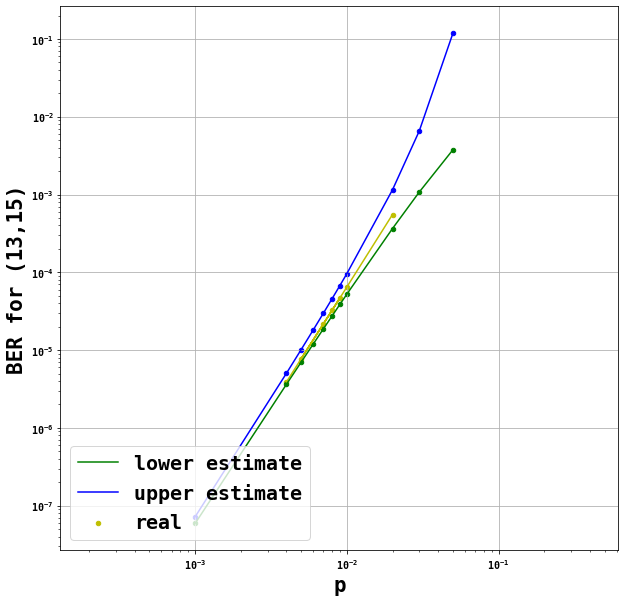

In [14]:
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
plt.xscale('log')

plt.scatter(p_array, np.hstack(BER_real[0]),color='y',s=20, alpha=1, label = 'real')
plt.plot(p_array, np.hstack(BER_real[0]),color='y', alpha=1)

plt.plot(p_array_, ber_lower_1315,color='g', alpha=1, label = 'lower estimate')
plt.scatter(p_array_, ber_lower_1315,color='g',s=20, alpha=1)

plt.plot(p_array_, [min(1, elem) for elem in ber_upper_1315],color='blue', alpha=1, label = 'upper estimate')
plt.scatter(p_array_, [min(1, elem) for elem in ber_upper_1315],color='blue',s=20, alpha=1)
plt.grid()
plt.xlabel('p', **font)
plt.ylabel('BER for (13,15)', **font)
plt.legend(loc=3, prop={'size': 20})
#plt.xticks(ticks = range(4,15,2))
# plt.savefig('ber1315.png', dpi = 150)

In [15]:
fer1317_low, fer1317_up = [], []
for p in p_array_:
    i1317_low = []
    for i in range(0,len(code1317_a)):
        i1317_low.append(low_burst(code1317_a[i], code1317_k[i], p, m))


    i1317_up = [0]*24
    for i in range(4,28):
        for j,elem in enumerate(answ1317[i]):
            i1317_up[i-4] += ansn1317[i][j]*up_burst(elem,i,p, m)

    id_low = 4 + np.argmax(i1317_low)
    low = (1000 - id_low) * max(i1317_low)
    sum_up = 0
    for i in range(4, 28):
        sum_up += (1000 - i) * i1317_up[i-4]
    if(sum_up > 1):
        sum_up = 1
    fer1317_low.append(low)
    fer1317_up.append(sum_up)
    print("Final ", low, sum_up)

Final  9.816513532896214e-06 1.0217009878167925e-05
Final  0.000603261618001103 0.0007083686119968916
Final  0.001162377358004498 0.0014212923779061259
Final  0.001981511353221506 0.0025234137153920676
Final  0.0031041084413279923 0.0041178010728226445
Final  0.00457095484751159 0.00631773315577659
Final  0.006420264901181134 0.009247643066411394
Final  0.008687765703240268 0.013044180310509973
Final  0.06060453890130159 0.1404128669056976
Final  0.1781133729239122 0.6713559989402975
Final  0.6226755038916695 1


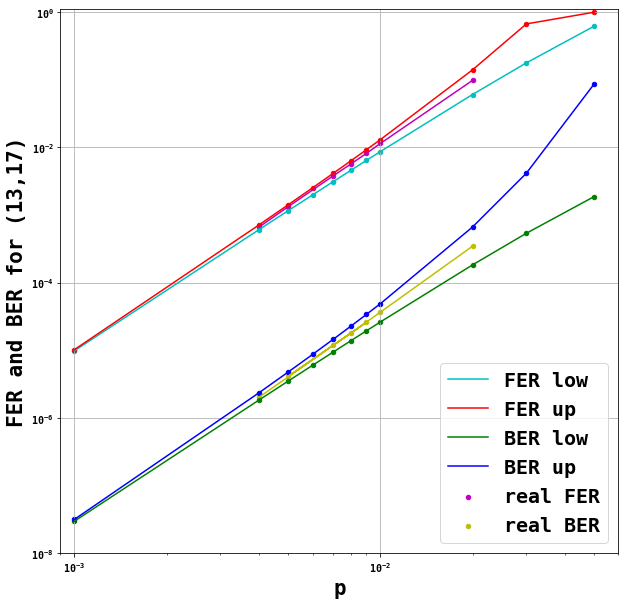

In [16]:
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
plt.xscale('log')

plt.scatter(p_array_fer, FER_real[1],color='m',s=20, alpha=1, label = 'real FER')
plt.plot(p_array_fer, FER_real[1],color='m', alpha=1)

plt.scatter(p_array_, fer1317_low, color='c',s=20, alpha=1)
plt.plot(p_array_, fer1317_low, color='c', alpha=1, label = 'FER low')

plt.scatter(p_array_, fer1317_up, color='r',s=20, alpha=1)
plt.plot(p_array_, fer1317_up, color='r', alpha=1, label = 'FER up')

plt.scatter(p_array, np.hstack(BER_real[1]), color='y',s=20, alpha=1, label = 'real BER')
plt.plot(p_array, np.hstack(BER_real[1]), color='y', alpha=1)

plt.plot(p_array_, ber_lower_1317,color='g', alpha=1, label = 'BER low')
plt.scatter(p_array_, ber_lower_1317,color='g',s=20, alpha=1)

plt.plot(p_array_, [min(1, elem) for elem in ber_upper_1317],color='blue', alpha=1, label = 'BER up')
plt.scatter(p_array_, [min(1, elem) for elem in ber_upper_1317],color='blue',s=20, alpha=1)
plt.grid()
plt.xlim((0.0009, 0.06))
plt.ylim((1*10**(-8), 1.1))
plt.xlabel('p', **font)
plt.ylabel('FER and BER for (13,17)', **font)
plt.legend(loc=4, prop={'size': 20})
#plt.xticks(ticks = range(4,15,2))
plt.savefig('ber1317.png', dpi = 150)

In [17]:
p_ = p_array_
fer1315_low, fer1315_up = [], []
for p in p_:
    i1315_low = []
    for i in range(0,len(code1315_a)):
        i1315_low.append(low_burst(code1315_a[i], code1315_k[i], p, m))


    i1315_up = [0]*24
    for i in range(4,28):
        for j,elem in enumerate(answ1315[i]):
            i1315_up[i-4] += ansn1315[i][j]*up_burst(elem,i,p, m)

    id_low = 4 + np.argmax(i1315_low)
    low = (1000 - id_low) * 2*max(i1315_low)
    sum_up = 0
    for i in range(4, 28):
        sum_up += (1000 - i) * i1315_up[i-4]
    fer1315_low.append(min(1, low))
    if(sum_up > 1):
        sum_up = 1
    fer1315_up.append(sum_up)
    print("Final ", low, sum_up)

Final  1.9652758751285686e-05 2.0222727694206874e-05
Final  0.0012077358221690422 0.0013606575109050753
Final  0.0023224182791084856 0.0027039310957245716
Final  0.003967005643836422 0.004755568025947462
Final  0.006201977468703567 0.007688794102910386
Final  0.009151097543962901 0.01168983686808036
Final  0.012853434857440022 0.016959231421709676
Final  0.017358068560845884 0.023713288804614673
Final  0.12133089597124903 0.23583395725229916
Final  0.3558687290178266 1
Final  1.2466026168363877 1


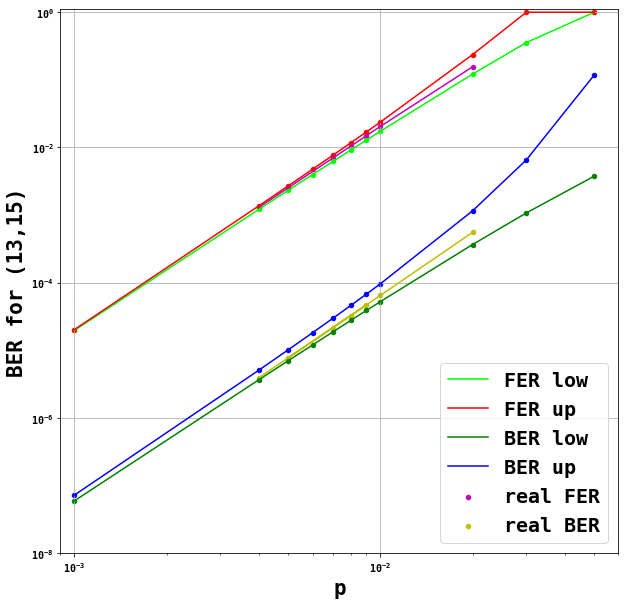

In [18]:
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
plt.xscale('log')

plt.scatter(p_array_fer, FER_real[0],color='m',s=20, alpha=1, label = 'real FER')
plt.plot(p_array_fer, FER_real[0],color='m', alpha=1)

plt.scatter(p_array_, fer1315_low, color='lime',s=20, alpha=1)
plt.plot(p_array_, fer1315_low, color='lime', alpha=1, label = 'FER low')

plt.scatter(p_array_, fer1315_up, color='r',s=20, alpha=1)
plt.plot(p_array_, fer1315_up, color='r', alpha=1, label = 'FER up')


plt.scatter(p_array, np.hstack(BER_real[0]),color='y',s=20, alpha=1, label = 'real BER')
plt.plot(p_array, np.hstack(BER_real[0]),color='y', alpha=1)

plt.plot(p_array_, ber_lower_1315,color='g', alpha=1, label = 'BER low')
plt.scatter(p_array_, ber_lower_1315,color='g',s=20, alpha=1)

plt.plot(p_array_, [min(1, elem) for elem in ber_upper_1315],color='blue', alpha=1, label = 'BER up')
plt.scatter(p_array_, [min(1, elem) for elem in ber_upper_1315],color='blue',s=20, alpha=1)
plt.grid()

plt.xlim((0.0009, 0.06))
plt.ylim((1*10**(-8), 1.1))
plt.xlabel('p', **font)
plt.ylabel('BER for (13,15)', **font)
plt.legend(loc=4, prop={'size': 20})
#plt.xticks(ticks = range(4,15,2))
plt.savefig('ber1315.png', dpi = 150)

In [19]:
ber_upper_1317_elems = []
for p in p_array_:
    ber_elems = []
    for n in [4, 8, 12, 16, 20, 24]:

        iapp_y1317 = [0]*24

        for i in range(4,28):
            for j,elem in enumerate(answ1317[i]):
                iapp_y1317[i-4] += ansn1317[i][j]*up_burst(elem,i,p, m)
        ber_elems.append((np.array(max_weights_1317) * np.array(iapp_y1317))[:n].sum()/2)
    ber_upper_1317_elems.append(ber_elems)

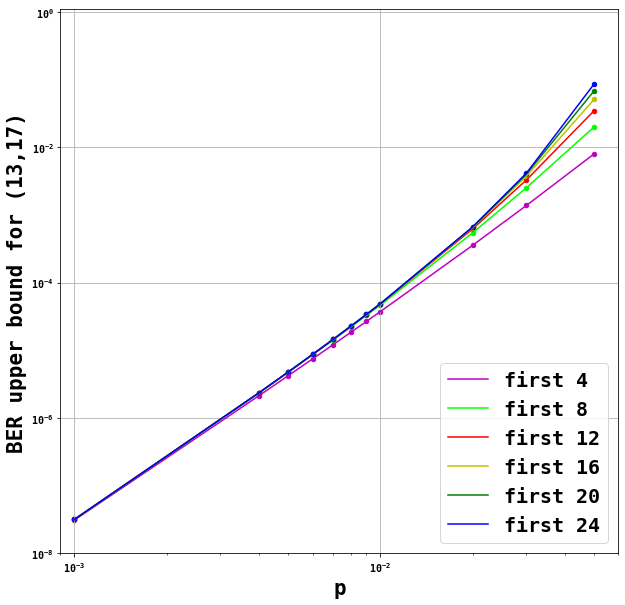

In [20]:
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
plt.xscale('log')

plt.scatter(p_array_, np.array(ber_upper_1317_elems)[:, 0],color='m',s=20, alpha=1)
plt.plot(p_array_, np.array(ber_upper_1317_elems)[:, 0],color='m', alpha=1, label = 'first 4')

plt.scatter(p_array_, np.array(ber_upper_1317_elems)[:, 1], color='lime',s=20, alpha=1)
plt.plot(p_array_, np.array(ber_upper_1317_elems)[:, 1], color='lime', alpha=1, label = 'first 8')

plt.scatter(p_array_, np.array(ber_upper_1317_elems)[:, 2], color='r',s=20, alpha=1)
plt.plot(p_array_, np.array(ber_upper_1317_elems)[:, 2], color='r', alpha=1, label = 'first 12')

plt.scatter(p_array_, np.array(ber_upper_1317_elems)[:, 3],color='y',s=20, alpha=1)
plt.plot(p_array_, np.array(ber_upper_1317_elems)[:, 3],color='y', alpha=1, label = 'first 16')

plt.scatter(p_array_, np.array(ber_upper_1317_elems)[:, 4],color='g',s=20, alpha=1)
plt.plot(p_array_, np.array(ber_upper_1317_elems)[:, 4],color='g', alpha=1, label = 'first 20')

plt.plot(p_array_, np.array(ber_upper_1317_elems)[:, 5],color='blue', alpha=1, label = 'first 24')
plt.scatter(p_array_, np.array(ber_upper_1317_elems)[:, 5],color='blue',s=20, alpha=1)
plt.grid()

plt.xlim((0.0009, 0.06))
plt.ylim((1*10**(-8), 1.1))
plt.xlabel('p', **font)
plt.ylabel('BER upper bound for (13,17)', **font)
plt.legend(loc=4, prop={'size': 20})
#plt.xticks(ticks = range(4,15,2))
plt.savefig('ber_est1317.png', dpi = 150)